In [20]:
FC_DEPTH = 6
MAX_ITER = 1000
TARGET_DIFF = 1e-8

In [21]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline

In [22]:
import os,sys,inspect
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [23]:
import torchvision.datasets as dataset
from utils import trainer, visualizer

### Dataset

In [24]:
mnist = dataset.MNIST('../data', download=True)

In [25]:
fashin = dataset.FashionMNIST('../data', download=True)

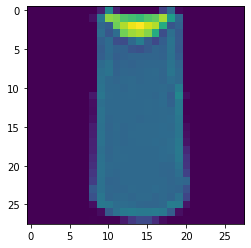

In [26]:
target = fashin.data[2]
imshow(fashin.data[2])

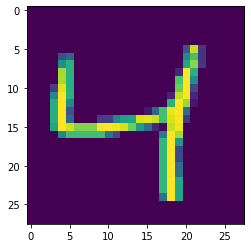

In [27]:
target = mnist.data[2]
imshow(mnist.data[2])

### Network - Train

In [28]:
import torch
import torch.nn as nn

In [29]:
class FC(nn.Module):
    def __init__(self, depth, output_size, activation=nn.Sigmoid()):
        assert depth > 0

        super(FC,self).__init__()
        li = [nn.Linear(output_size, output_size)]
        for _ in range(depth-1):
            li.append(nn.Linear(output_size, output_size))
        
        self.net = nn.Sequential(*li)
        self.activation = activation
    
    def forward(self, x):
        return self.activation(self.net(x))

In [30]:
model = FC(FC_DEPTH, mnist.data.shape[-1] * mnist.data.shape[-1], lambda x: x)
target_flt = torch.flatten(target)/256.

In [31]:
img = visualizer.predictor(model, [target_flt], cuda=False)

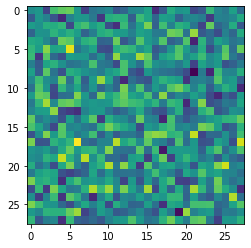

In [32]:
imshow(img)

In [33]:
trainer.reconst_trainer(model.cuda(), target_flt.cuda(), obj_threshold=TARGET_DIFF, max_iter=MAX_ITER)

### Visualize

In [34]:
target_images = []

In [35]:
target_images.append(mnist.data[2]/256.)
target_images.append(fashin.data[2]/256.)

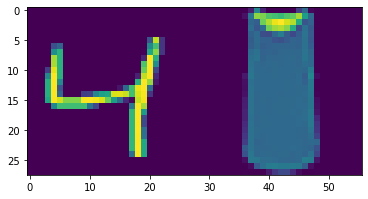

In [36]:
imshow(np.concatenate(target_images, axis=1))

In [37]:
img = visualizer.predictor(model, target_images)

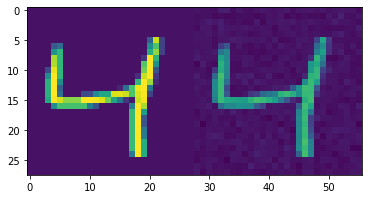

In [38]:
imshow(img)